# Análise de Sentimentos

Este projeto tem como objetivo realizar uma análise de sentimentos em dados extraídos de arquivos CSV. Utiliza-se a biblioteca `VADER SentimentIntensityAnalyzer` para calcular as pontuações de sentimento dos textos presentes em cada CSV.


In [1]:
# Importação de Bibliotecas e Configuração Inicial
import os
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
# Inicialização do SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [3]:
# Definindo os caminhos das pastas de entrada e saída
output_folder_path = r'csv\resultados'

# Criação da pasta de resultados se não existir
if not os.path.exists(output_folder_path):
    os.makedirs(output_folder_path)

csv_folder_path = r'csv\extraidos\wrong-planet'
results_folder_path = r'csv\resultados'

# Listagem dos arquivos CSV na pasta de entrada
csv_files = [f for f in os.listdir(csv_folder_path) if f.endswith('.csv')]

for file in csv_files:
    file_path = os.path.join(csv_folder_path, file)
    
    # Leitura do CSV
    df = pd.read_csv(file_path)
    
    if 'Conteúdo da Mensagem' in df.columns:
        # Cálculo das pontuações de sentimento
        df['sentiment_score'] = df['Conteúdo da Mensagem'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
        
        # Salvamento do resultado em um novo arquivo CSV
        output_file_path = os.path.join(results_folder_path, f'analise_sentimentos_{file}')
        df.to_csv(output_file_path, index=False)
        
        print(f"Análise de sentimentos concluída e salva para {file}")
    else:
        print(f"A coluna 'post_content' não foi encontrada no arquivo {file}. Verifique o nome correto da coluna.")


Análise de sentimentos concluída e salva para 67andneverhadagfAsperger's&AutismCommunity-WrongPlanet.csv
Análise de sentimentos concluída e salva para AgeatdiagnosisAsperger's&AutismCommunity-WrongPlanet.csv
Análise de sentimentos concluída e salva para AnyOfYouNotAbleToFriends.csv
Análise de sentimentos concluída e salva para DoIhavetobeallmusculartobeattractiveAsperger's&AutismCommunity-WrongPlanet.csv
Análise de sentimentos concluída e salva para DoWeHaveToDrinkTravelAndPartyToLiveLife.csv
Análise de sentimentos concluída e salva para feelingDiscouraged.csv
Análise de sentimentos concluída e salva para FriendshipBoardAge19Onwards.csv
Análise de sentimentos concluída e salva para GhostingisharshAsperger's&AutismCommunity-WrongPlanet.csv
Análise de sentimentos concluída e salva para HowdoyouthinkAsperger's&AutismCommunity-WrongPlanet.csv
Análise de sentimentos concluída e salva para HowtoavoidDatingaNarcissistAsperger's&AutismCommunity-WrongPlanet.csv
Análise de sentimentos concluída 

# Análise Exploratória de Dados

In [4]:
# Importação de bibliotecas de visualização
import matplotlib.pyplot as plt
import seaborn as sns

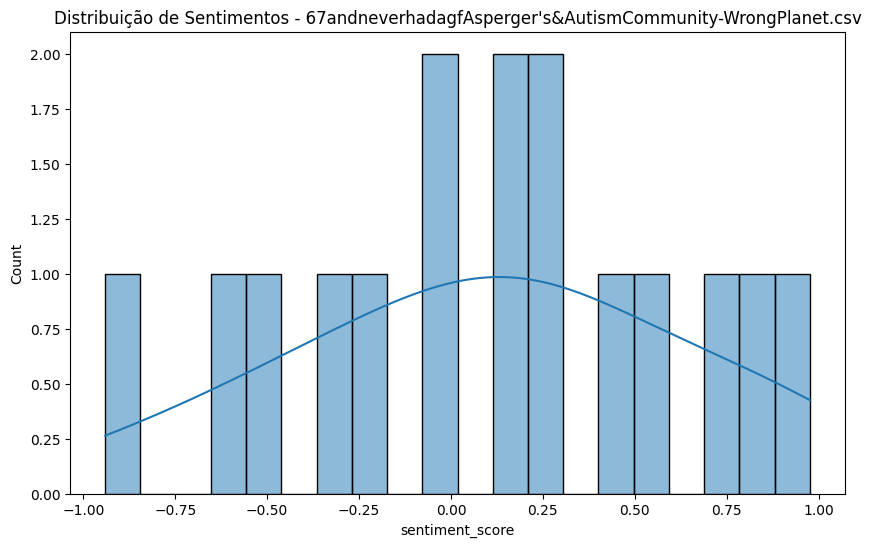

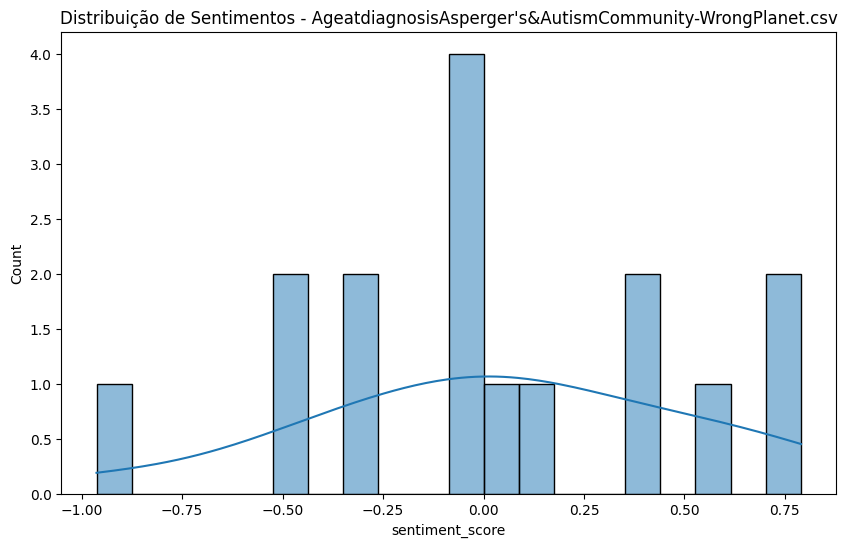

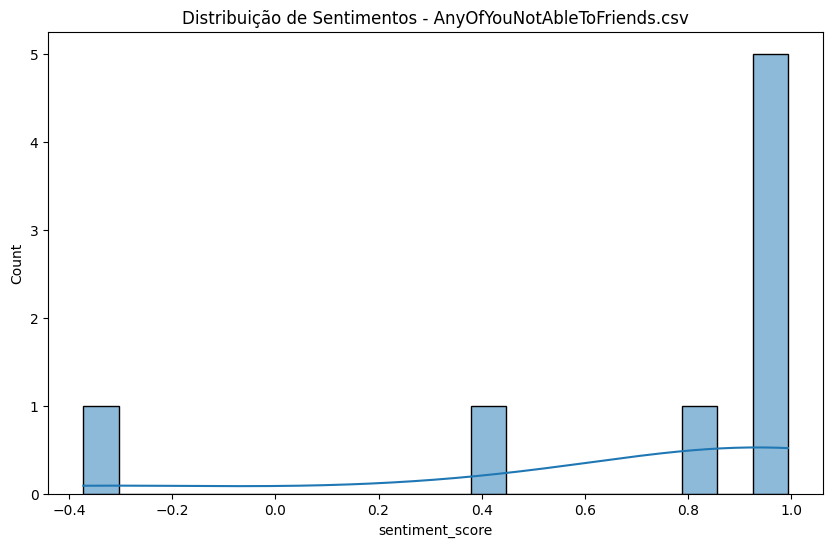

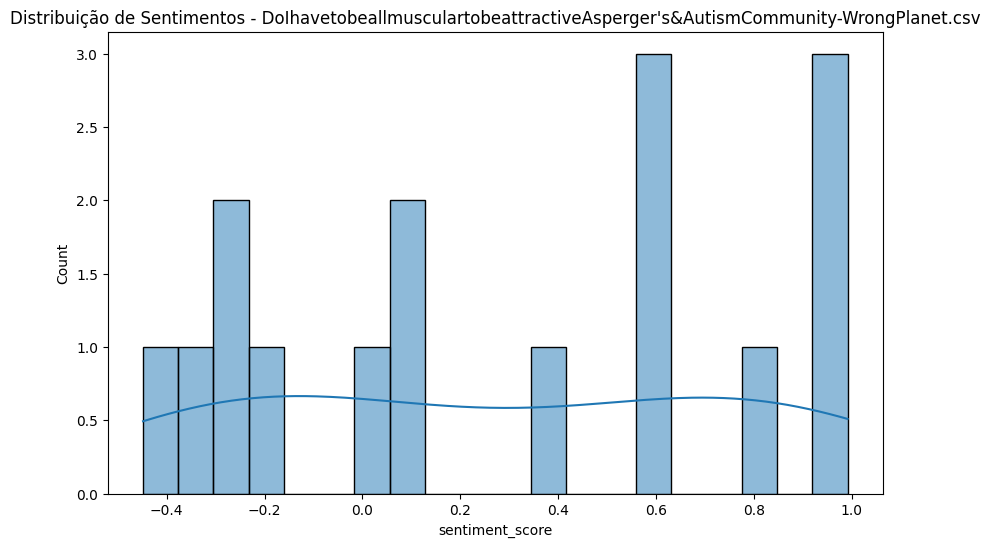

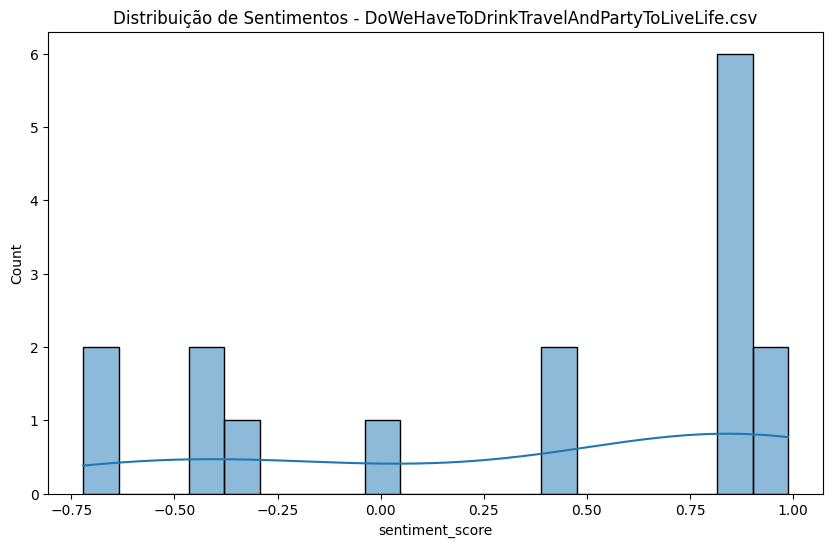

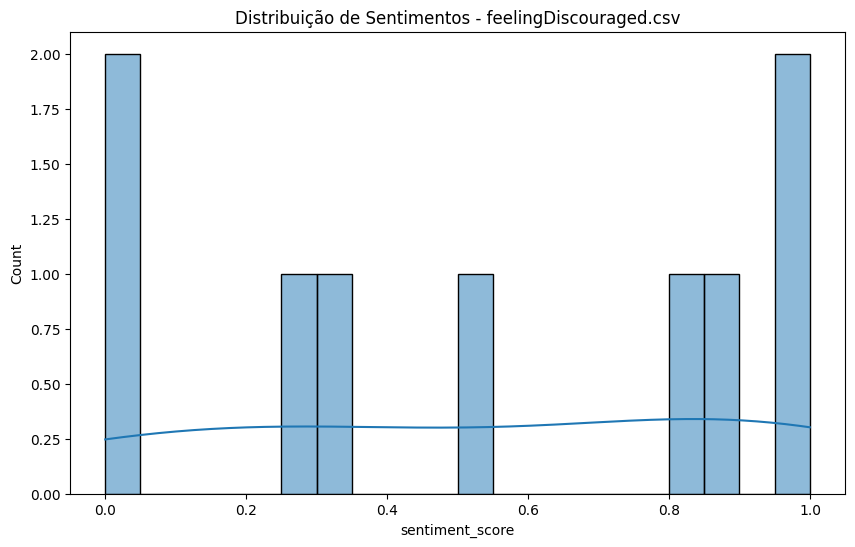

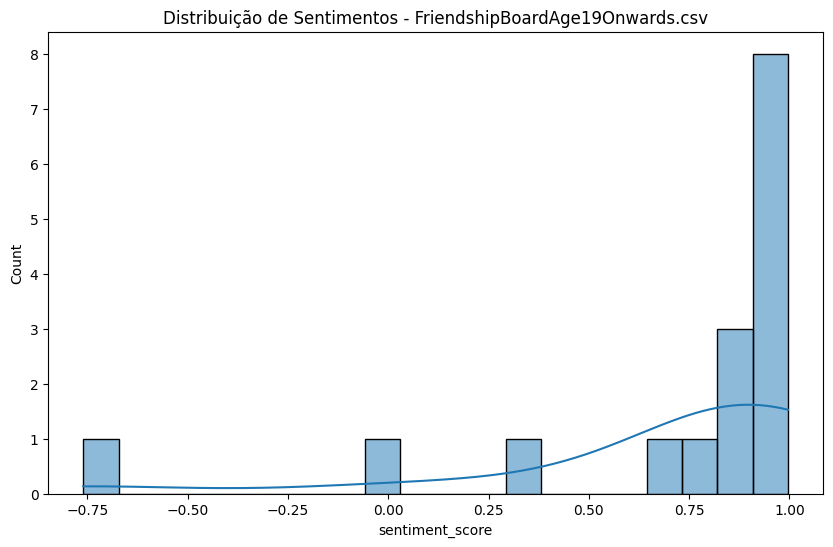

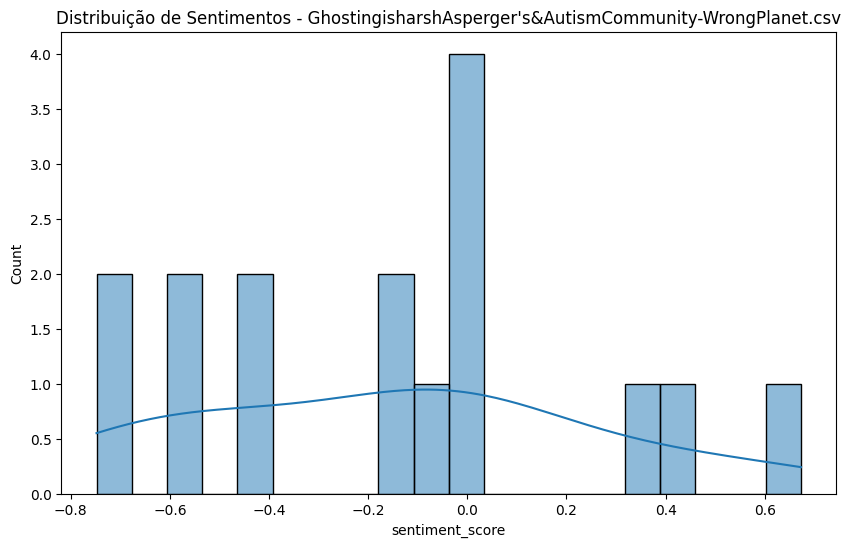

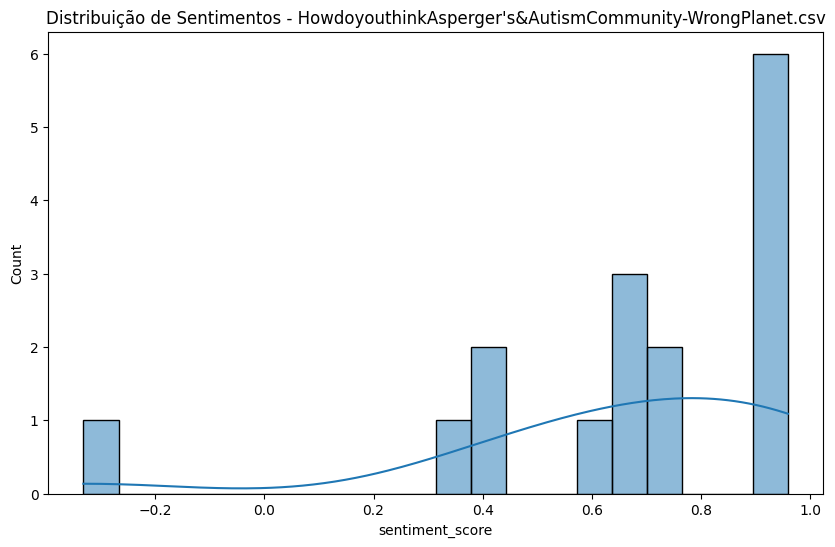

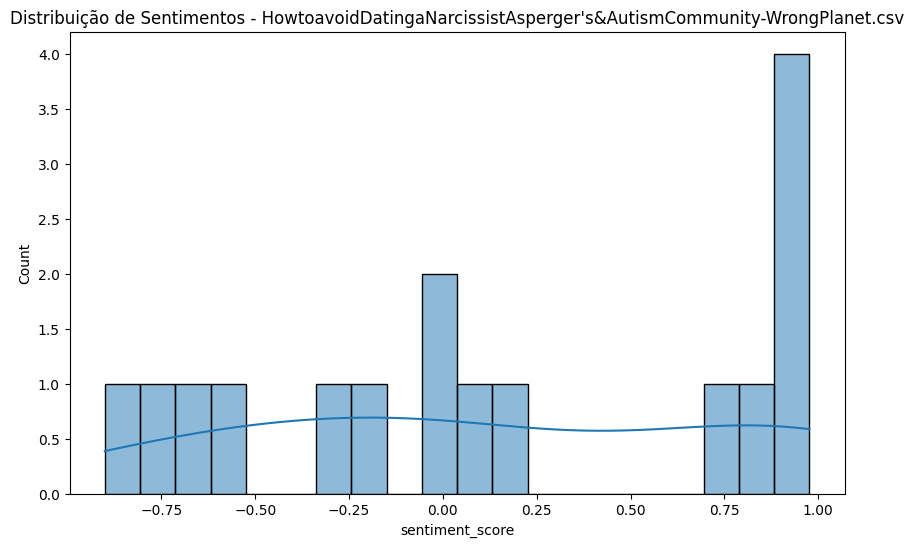

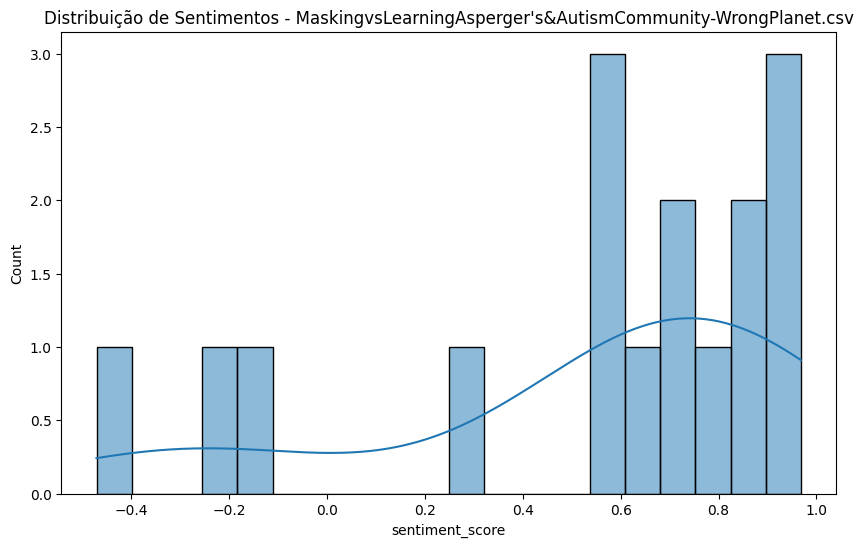

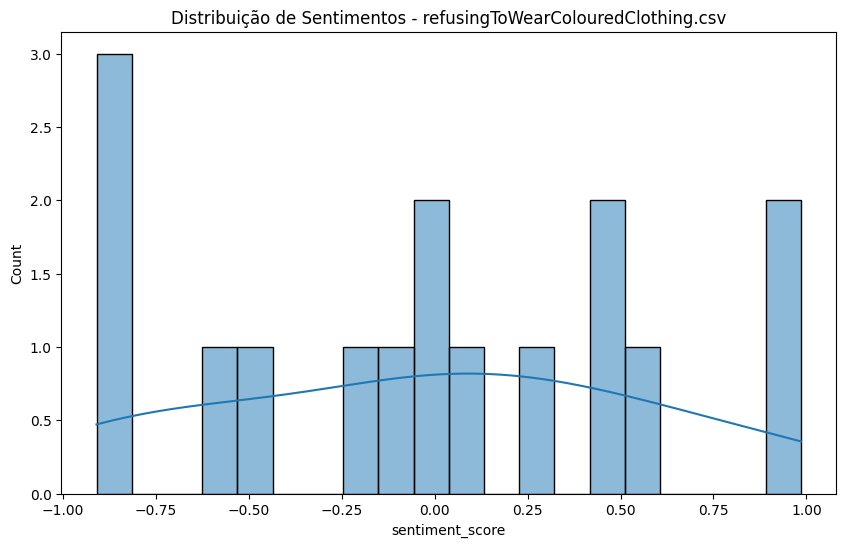

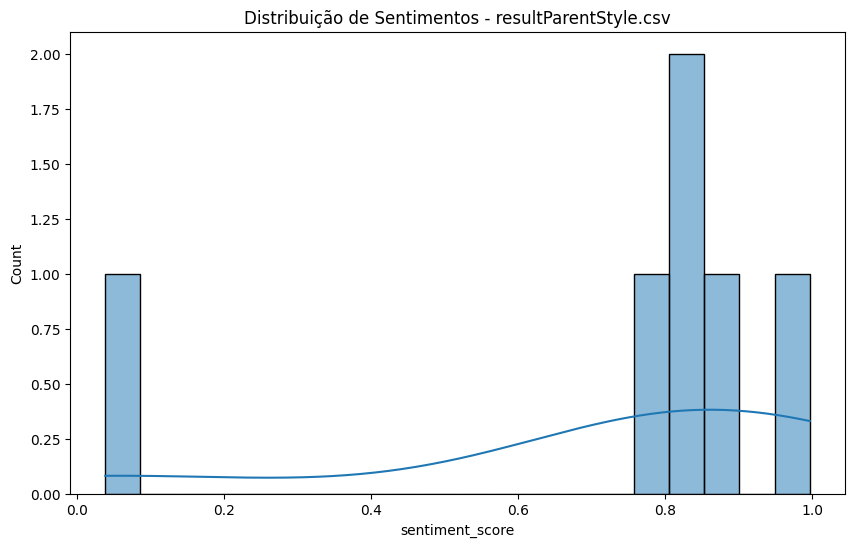

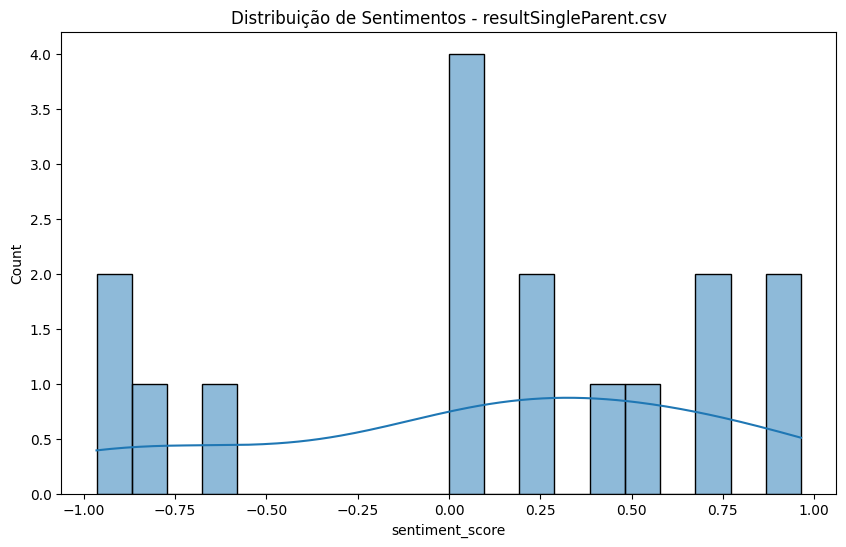

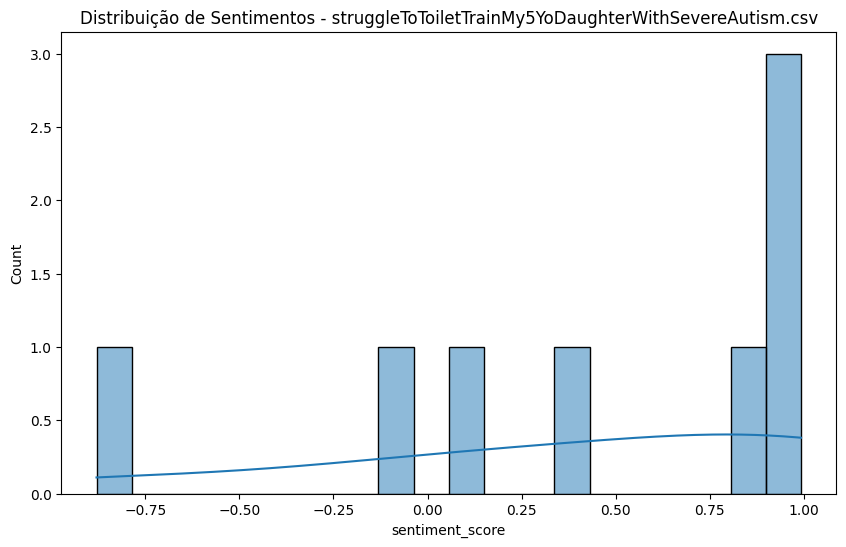

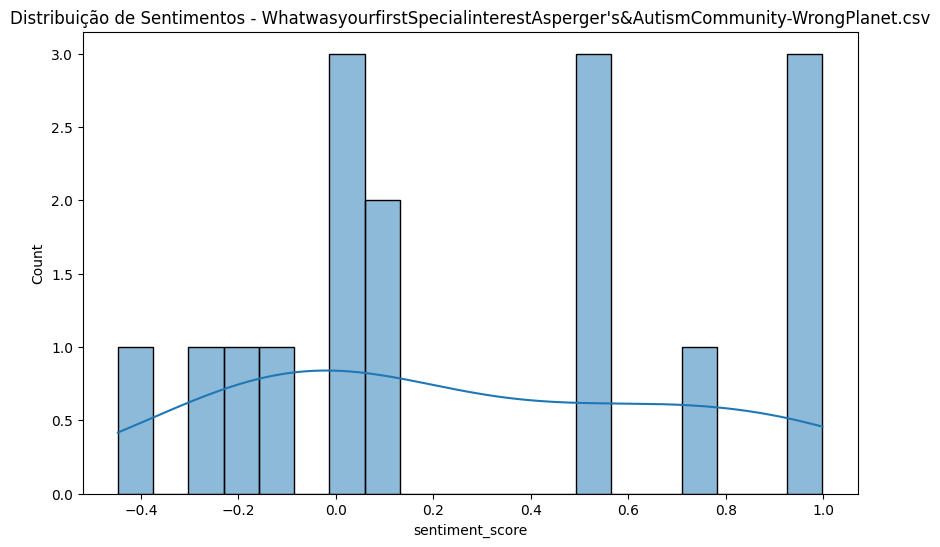

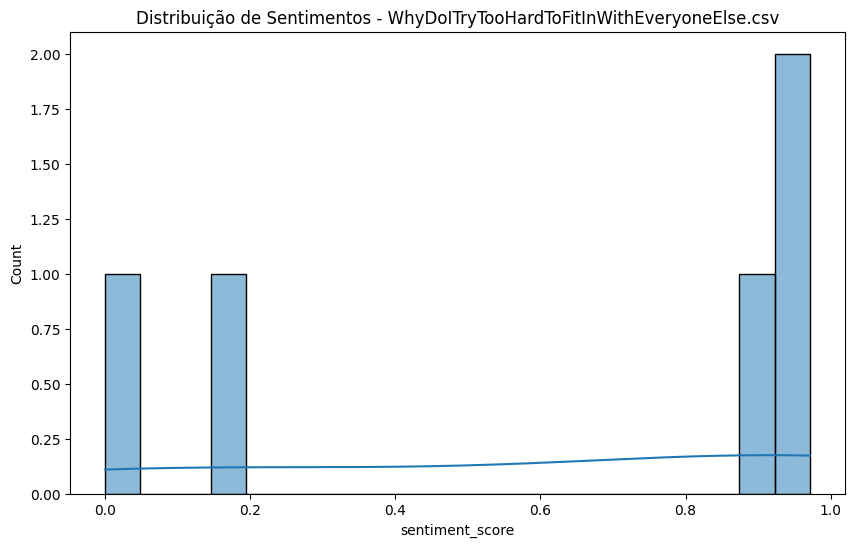

In [5]:
if not os.path.exists(results_folder_path):
    os.makedirs(results_folder_path)

csv_files = [f for f in os.listdir(csv_folder_path) if f.endswith('.csv')]

for file in csv_files:
    file_path = os.path.join(csv_folder_path, file) 
    
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        
        if 'Conteúdo da Mensagem' in df.columns:
            df['sentiment_score'] = df['Conteúdo da Mensagem'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
            
            output_file_path = os.path.join(results_folder_path, f'analise_sentimentos_{file}')
            df.to_csv(output_file_path, index=False)
            
            # Plot da distribuição das pontuações de sentimento
            plt.figure(figsize=(10,6))
            sns.histplot(df['sentiment_score'], bins=20, kde=True)
            plt.title(f'Distribuição de Sentimentos - {file}')
            plt.show()
        else:
            print(f"A coluna 'Conteúdo da Mensagem' não foi encontrada no arquivo {file}.")
    else:
        print(f"O arquivo {file} não foi encontrado no caminho {file_path}.")



#  Distribuição de Sentimentos

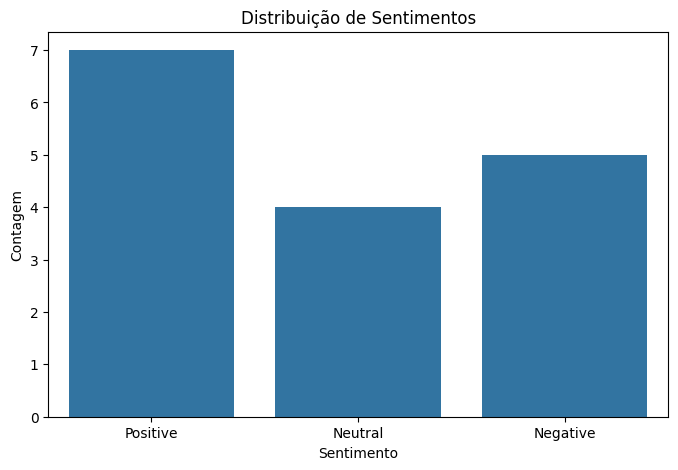

In [16]:
# Carrega o CSV com as análises de sentimento
df = pd.read_csv(r"csv\resultados\analise_sentimentos_AgeatdiagnosisAsperger's&AutismCommunity-WrongPlanet.csv")

# Cria uma nova coluna para classificar o sentimento
df['Sentiment'] = df['sentiment_score'].apply(lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral'))

# Gráfico de barras da distribuição de sentimentos
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', data=df, order=['Positive', 'Neutral', 'Negative'])
plt.title("Distribuição de Sentimentos")
plt.xlabel("Sentimento")
plt.ylabel("Contagem")
plt.show()


# Análise de Sentimentos por Usuário

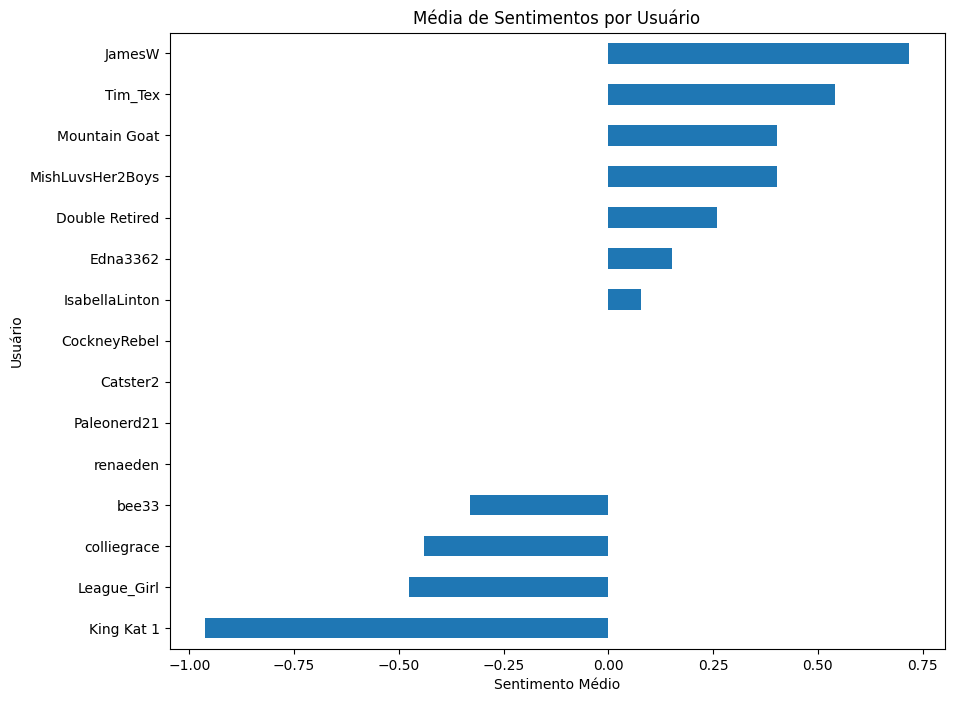

In [17]:
# Média de sentimento por usuário
user_sentiment = df.groupby('Nome do Usuário')['sentiment_score'].mean().sort_values()

# Gráfico de barras da média de sentimentos por usuário
plt.figure(figsize=(10, 8))
user_sentiment.plot(kind='barh')
plt.title("Média de Sentimentos por Usuário")
plt.xlabel("Sentimento Médio")
plt.ylabel("Usuário")
plt.show()


# Histograma de Sentimentos

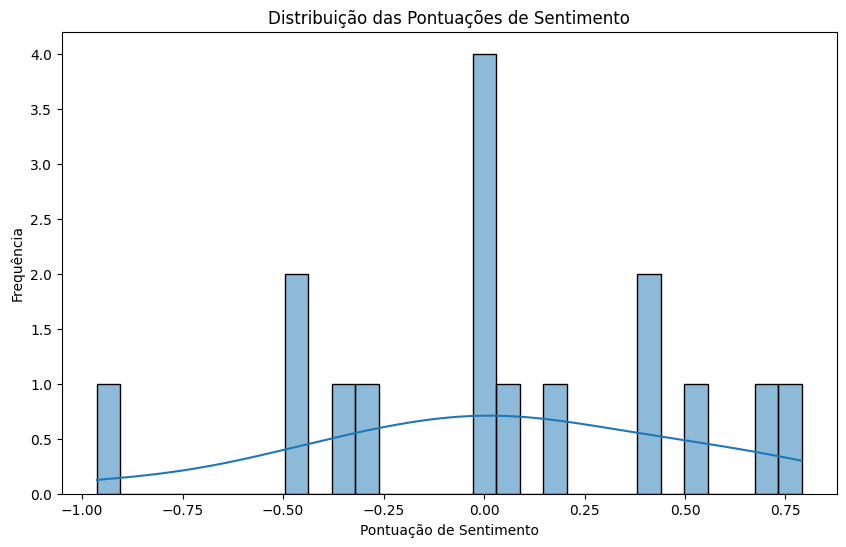

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_score'], bins=30, kde=True)
plt.title("Distribuição das Pontuações de Sentimento")
plt.xlabel("Pontuação de Sentimento")
plt.ylabel("Frequência")
plt.show()


# Palavras Frequentes

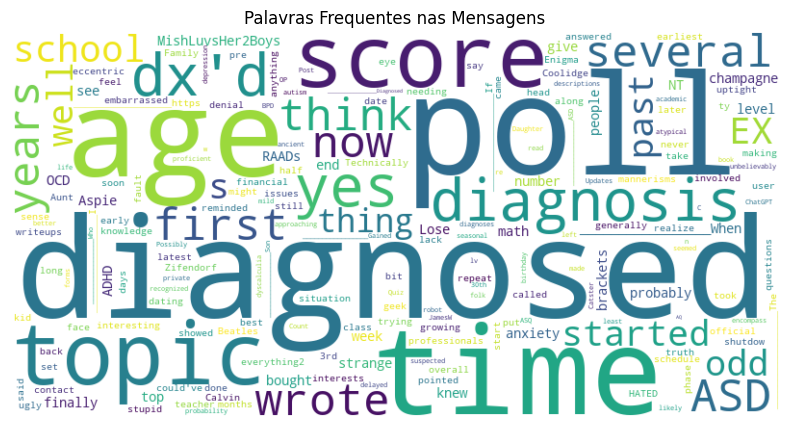

In [ ]:
from wordcloud import WordCloud

# Junta todas as mensagens
text = ' '.join(df['Conteúdo da Mensagem'].dropna())

# Gera a nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostra a nuvem de palavras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Palavras Frequentes nas Mensagens")
plt.show()


# Sentimento por Gênero

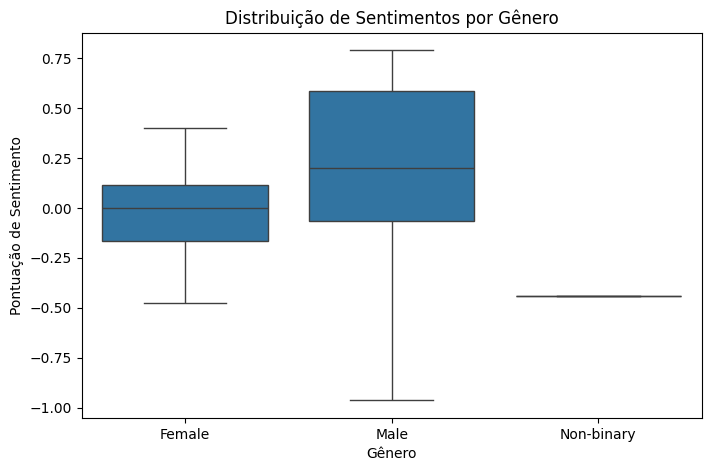

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Gênero', y='sentiment_score', data=df)
plt.title("Distribuição de Sentimentos por Gênero")
plt.xlabel("Gênero")
plt.ylabel("Pontuação de Sentimento")
plt.show()
